In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para deixar os gráficos mais bonitos
sns.set_style('whitegrid')

# Carregando o arquivo csv para dentro de um DataFrame (uma tabela programável)
df = pd.read_csv('train.csv')

# Exibindo as 5 primeiras linhas para ver a cara dos dados
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Mostra o tipo de cada coluna e quantos valores não-nulos existem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 1. Calcular a média de idade
media_idade = df['Age'].mean()
print(f'A média de idade é: {media_idade:.1f} anos')

# 2. Preencher os valores vazios (fillna) com essa média --- Afinal muitas pessoas não tem idade declarada no csv
# A gente atribui o resultado de volta à coluna 'Age'
df['Age'] = df['Age'].fillna(media_idade)

# 3. Verificar se ainda existe algum nulo
print(f"Valores nulos após tratamento: {df['Age'].isnull().sum()}")

A média de idade é: 29.7 anos
Valores nulos após tratamento: 0


In [5]:
# 1. Apagar a coluna 'Cabin' porque tem muita informação faltando ----- "chutar" esse tipo de informação é arriscado demais.
df = df.drop('Cabin', axis=1)

# 2. Apagar as poucas linhas onde 'Embarked' está vazio (são só 2 passageiros)
df = df.dropna()

# 3. Conferir se está tudo 100% limpo agora
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


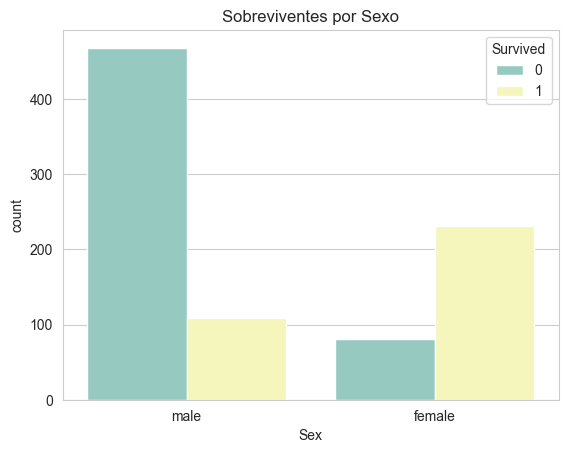

In [6]:
# Gráfico de barras: Sobreviventes dividido por Sexo
# ----------------------
# x = eixo horizontal (Sexo)
# hue = o que vai colorir as barras (Sobreviveu ou Não?)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sobreviventes por Sexo')
plt.show()